In [5]:
!pip install shap

     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     --------------------- ------------------ 30.7/57.6 kB ? eta -:--:--
     ---------------------------------------- 57.6/57.6 kB 1.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/447.3 kB ? eta -:--:--
   --- ------------------------------------ 41.0/447.3 kB 2.0 MB/s eta 0:00:01
   ------ -------------------------------- 71.7/447.3 kB 991.0 kB/s eta 0:00:01
   ------------- -------------------------- 153.6/447.3 kB 1.5 MB/s eta 0:00:01
   --------------------- ------------------ 235.5/447.3 kB 1.6 MB/s eta 0:00:01
   ------------------------- -------------- 286.7/447.3 kB 1.6 MB/s eta 0:00:01
   ------------------------- -------------- 286.7/447.3 kB 1.6 MB/s eta 0:00:01
   ------------------------- -------------- 286.7/447.3 kB 1.6 MB/s eta 0:00:01
   ------------------------------------ --- 409.6/447.3 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------  440.3/447.3 kB 1.3 MB

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import shap

In [7]:
df = pd.read_csv("dataset.csv" ,  names=['MQ1', 'MQ2', 'MQ3', 'MQ4', 'MQ5', 'MQ6', 'CO2'])

In [8]:
def preprocess_inputs(df):
    df = df.copy()
    
    # Split df into X and y
    y = df['CO2']
    X = df.drop('CO2', axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
    
    return X_train, X_test, y_train, y_test

In [10]:
X_train, X_test, y_train, y_test = preprocess_inputs(df)

In [11]:
model = RandomForestClassifier(random_state=1)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [12]:
acc = model.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(acc * 100))

Accuracy: 94.40%


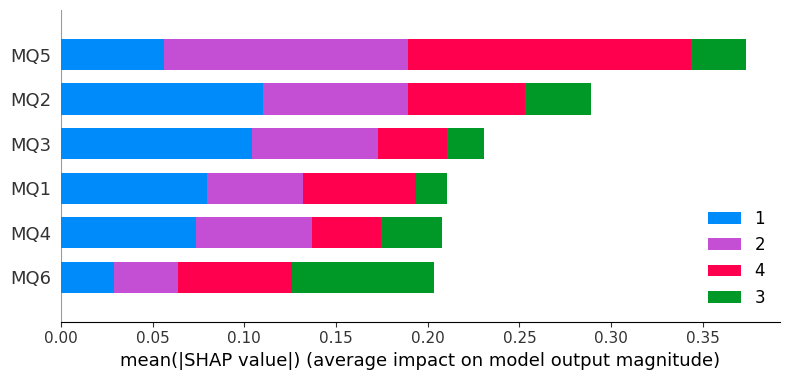

In [13]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, class_names=model.classes_)